In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random
import math
from scipy.integrate import simpson, trapz

## df1 = reference data
## df2 = accelerometer data
## step_size = time in seconds that the data was run for
def plot_and_analyze_data(df1, df2, step_size):
    # create a new column 't' assigning a time variable. this n is the number of entry each term is 
    # assuming we know data was taken for 5 min and assuming each term is equally spaced we get time assigned as 

    n = len(df2)
    df2['t'] = step_size/n * np.arange(0, n)

    # create a new column 'result' which is vector addition of two perpendicular vectors with Z being gravity
    # this is given in the form of G which is 9.8 ms2 henced we multiplied it to find it in ms/2

    df2['result'] = np.sqrt(9.8*(df2['X']**2) + 9.8*(df2['Y']**2))

    # create a new dataframe with only 't' and 'result' columns
    df2 = df2.loc[:, ['t', 'result']]

    # we need to ensure acceleration is absolute in car as it is not a vector on speedometer
    df1['result'] = abs(df1['result'])

    # Scatter plot for df2
    plt.scatter(df2['t'], df2['result'], label='Accelerometer Measurement Data')

    # Scatter plot for df1
    plt.scatter(df1['t'], df1['result'], label='Speedometer from car measurement Data')

    # Set the labels and title for the plot
    plt.xlabel('time (s)')
    plt.ylabel('acceleration (m/s2)')
    plt.title('Scatter Plot for Cars Speedometer vs Raspberry Pi Accelerometer Data' )

    # Add a legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

    plt.plot(df2['t'], df2['result'], label='Accelerometer Measurement Data')

    # Line plot for Cars Speedometer Data

    plt.plot(df1['t'], df1['result'], label='Speedometer from car measurement Data')

    # Set the labels and title for the plot
    plt.xlabel('time (s)')
    plt.ylabel('acceleration (m/s2)')
    plt.title('Line Plot for Cars Speedometer vs Raspberry Pi Accelerometer Data' )

    # Add a legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

    # Compute the area using the trapezoidal rule which we know gives us the change is speed as per calculus
    ## we took stepsize as every 5 seconds which is how we measured the car

    area_car_data = trapz(df1['result'], dx=5)
    print("area_car_data =", area_car_data)

    ## now for accelerometer with our stepsize being difference in time which is 300/n s.

    area_acc_data = trapz(df2['result'], dx= step_size/n)
    print("area_acc_data =", area_acc_data)


    ## finding std dev between our experimental data (raspi acc) and accurate measurement (car speedometer)

    std_dev_data1 = np.std(df2['result'] - df1['result'])
    print("std dev is", std_dev_data1)

    ## calculating exp mean
    result_mean_data1 = np.mean(df2['result'])

    print("Experimental mean is", result_mean_data1)

    ## Coefficient of variation (CV) which is the ratio of the std_dev to
    CV_data1 = std_dev_data1/result_mean_data1

    print("coefficient of variation is", CV_data1 )
    

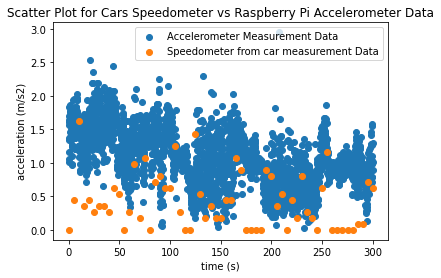

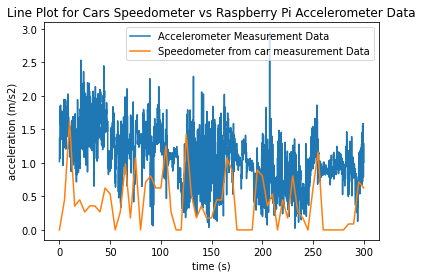

area_car_data = 126.3312
area_acc_data = 321.49252778297944
std dev is 0.46654184679964816
Experimental mean is 1.0719871036546318
coefficient of variation is 0.4352121823192722


In [5]:
run1_car = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/E_11_Run_1.csv')
new_df = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/432pm.csv')

plot_and_analyze_data(run1_car, new_df, 300)

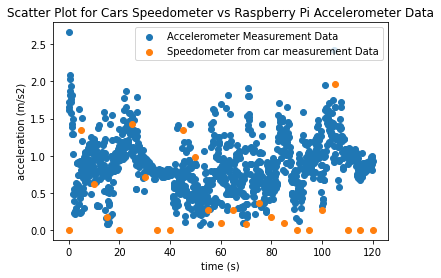

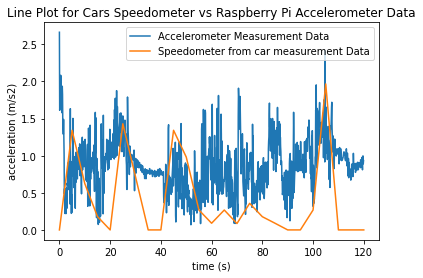

area_car_data = 50.94200000000001
area_acc_data = 105.34449884657369
std dev is 0.828709497638831
Experimental mean is 0.8794063835444365
coefficient of variation is 0.9423510144408183


In [7]:
## for data2

run2_car = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/E_11_Run_2.csv')
accel_car = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/439pm.csv')

plot_and_analyze_data(run2_car, accel_car, 120)

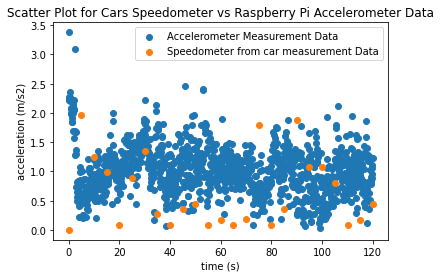

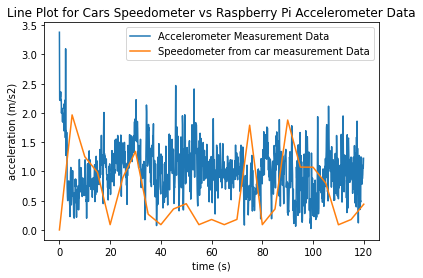

area_car_data = 78.89
area_acc_data = 121.2529062531063
std dev is 0.7111252916905137
Experimental mean is 1.0123996650105127
coefficient of variation is 0.7024155738762808


In [18]:
## for data3

run3_car = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/E_11_Run_3.csv')
accel_car2 = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/447pm.csv')

plot_and_analyze_data(run3_car, accel_car2, 120)

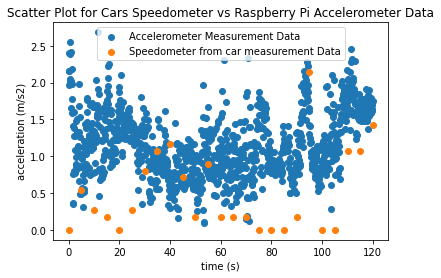

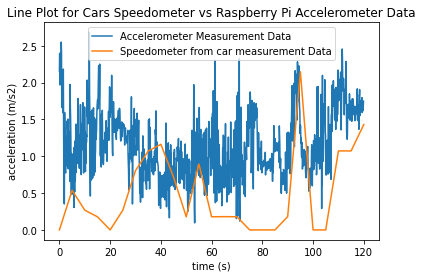

area_car_data = 58.998
area_acc_data = 137.9465947473939
std dev is 0.9602924028761575
Experimental mean is 1.1512207023904137
coefficient of variation is 0.8341514367159923


In [19]:
## for data4

run4_car = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/E_11_Run_4.csv')
accel_car2 = pd.read_csv(r'/Users/adimittal/Documents/GitHub/E11---AdiMarley/final project data/450pm.csv')

plot_and_analyze_data(run4_car, accel_car2, 120)